# HELP performance in E vs NE problem

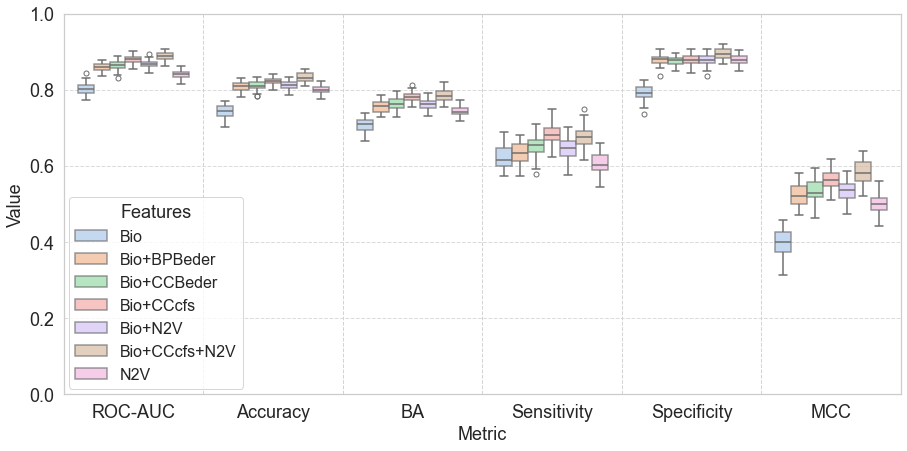

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

tissue = 'Kidney'
problem = 'EvsAE'
method1 = 'HELP'
method2 = 'AdAM'
method3 = 'FiPer'
method4 = 'OGEE'

scorepath = '../scores'
features = ["Bio", "Bio+BPBeder", "Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V", "N2V"]
suffixes = ['bio', 'biobpbeder', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v','n2v']

# Upload input datasets
dfs = []
for feature,suffix in zip(features,suffixes):
    df_tmp = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv")).drop("CM", axis=1)
    df_tmp['Feature'] = feature
    dfs += [df_tmp]

# Merge datasets and modify the dataframe for boxplot generation
Scores = pd.concat(dfs)
Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")

# Set seaborn style
sns.set(style="whitegrid", palette="pastel")

# Generate boxplots
plt.figure(figsize=(15, 7))
sns.boxplot(x="Metric", y="Value", hue="Feature", data=Scores, dodge=True,
            linewidth=1.5, fliersize=5, saturation=0.75, notch=False, boxprops=dict(alpha=0.7))

plt.ylim(0, 1)
#plt.title("Boxplots of Classification Metrics", fontsize=18)
plt.xlabel("Metric", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.legend(title="Features", fontsize="16", title_fontsize="18", loc="upper center", bbox_to_anchor=(0.11, 0.54))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add vertical lines between groups of metric values
unique_metrics = Scores["Metric"].unique()
for i in range(1, len(unique_metrics)):
    plt.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)

plt.show()


In [6]:
import pandas as pd
from tabulate import tabulate
import os
scorepath = '../scores'
method1 = 'HELP'
tissue = 'Lung'
problem = 'AEvsSNE'
df_p = pd.DataFrame()
features = ["Bio", "Bio+BPBeder", "Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V", "N2V"]
suffixes = ['bio', 'biobpbeder', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v','n2v']
for feature, suffix in zip(features,suffixes):
    print(feature, suffix)
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    metrics = df.drop(columns=['CM']).columns
    means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
    row_df = pd.DataFrame([[f"{means[m]:.4f}±{stds[m]:.4f}" for m in metrics]], columns=metrics, index=[feature])
    row_df['CM'] = df['CM'].values[0].replace('\n', ',')
    df_p = pd.concat([df_p, row_df])

print(tabulate(df_p, headers=df_p.columns, tablefmt="latex"))
df_p

Bio bio
Bio+BPBeder biobpbeder
Bio+CCBeder bioccbeder
Bio+CCcfs biocc
Bio+N2V bion2v
Bio+CCcfs+N2V bioccn2v
N2V n2v
\begin{tabular}{llllllll}
\hline
               & ROC-AUC       & Accuracy      & BA            & Sensitivity   & Specificity   & MCC           & CM                         \\
\hline
 Bio           & 0.7257±0.0096 & 0.7295±0.0069 & 0.6647±0.0096 & 0.5563±0.0197 & 0.7731±0.0085 & 0.2901±0.0164 & [[ 323  265], [ 520 1817]] \\
 Bio+BPBeder   & 0.7305±0.0098 & 0.7788±0.0053 & 0.6624±0.0085 & 0.4676±0.0185 & 0.8573±0.0069 & 0.3208±0.0152 & [[ 282  306], [ 322 2013]] \\
 Bio+CCBeder   & 0.7331±0.0102 & 0.7730±0.0069 & 0.6656±0.0106 & 0.4859±0.0229 & 0.8453±0.0089 & 0.3199±0.0190 & [[ 293  295], [ 378 1959]] \\
 Bio+CCcfs     & 0.7451±0.0118 & 0.7713±0.0067 & 0.6791±0.0105 & 0.5249±0.0207 & 0.8333±0.0072 & 0.3369±0.0188 & [[ 328  261], [ 402 1933]] \\
 Bio+N2V       & 0.7385±0.0097 & 0.7688±0.0070 & 0.6669±0.0095 & 0.4964±0.0185 & 0.8374±0.0081 & 0.3182±0.0178 & [[ 289  299], [ 

,ROC-AUC,Accuracy,BA,Sensitivity,Specificity,MCC,CM
Bio,0.7257±0.0096,0.7295±0.0069,0.6647±0.0096,0.5563±0.0197,0.7731±0.0085,0.2901±0.0164,"[[ 323 265], [ 520 1817]]"
Bio+BPBeder,0.7305±0.0098,0.7788±0.0053,0.6624±0.0085,0.4676±0.0185,0.8573±0.0069,0.3208±0.0152,"[[ 282 306], [ 322 2013]]"
Bio+CCBeder,0.7331±0.0102,0.7730±0.0069,0.6656±0.0106,0.4859±0.0229,0.8453±0.0089,0.3199±0.0190,"[[ 293 295], [ 378 1959]]"
Bio+CCcfs,0.7451±0.0118,0.7713±0.0067,0.6791±0.0105,0.5249±0.0207,0.8333±0.0072,0.3369±0.0188,"[[ 328 261], [ 402 1933]]"
Bio+N2V,0.7385±0.0097,0.7688±0.0070,0.6669±0.0095,0.4964±0.0185,0.8374±0.0081,0.3182±0.0178,"[[ 289 299], [ 388 1946]]"
Bio+CCcfs+N2V,0.7482±0.0122,0.7812±0.0079,0.6746±0.0136,0.4961±0.0271,0.8532±0.0082,0.3398±0.0244,"[[ 310 279], [ 357 1974]]"
N2V,0.6905±0.0138,0.7528±0.0079,0.6285±0.0114,0.4206±0.0219,0.8364±0.0087,0.2507±0.0216,"[[ 242 346], [ 352 1985]]"


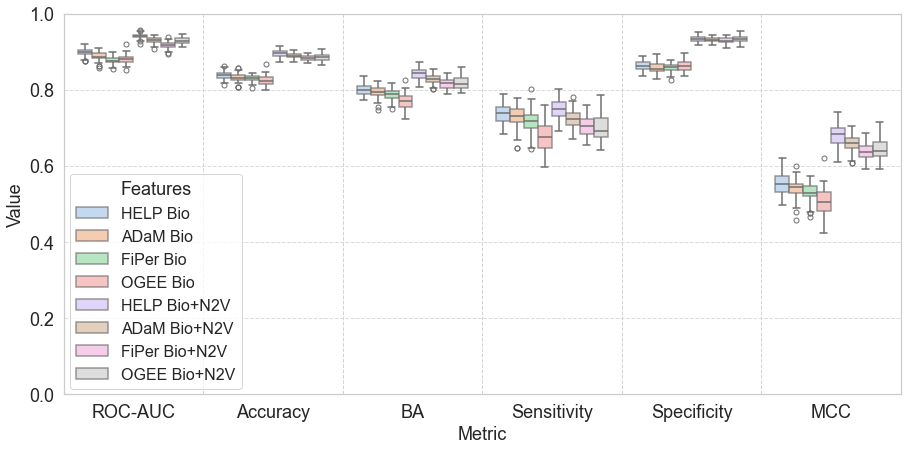

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

tissue = 'Kidney'
problem = 'EvsNE'
method1 = 'HELP'
method2 = 'AdAM'
method3 = 'FiPer'
method4 = 'OGEE'
methods = ['HELP', 'AdAM', 'FiPer', 'OGEE']
aliases = ['HELP', 'ADaM', 'FiPer', 'OGEE']

scorepath = '../scores'
features = ["Bio", "Bio+N2V"]
suffixes = ['bio', 'bion2v']
# Upload input datasets
dfs = []
for feature,suffix in zip(features,suffixes):
    for method,alias in zip(methods,aliases):
        df_tmp = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method}_{tissue}_{problem}_{suffix}.csv")).drop("CM", axis=1)
        df_tmp['Feature'] = f'{alias} {feature}'
        dfs += [df_tmp]

# Merge datasets and modify the dataframe for boxplot generation
Scores = pd.concat(dfs)
Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")

# Set seaborn style
sns.set(style="whitegrid", palette="pastel")

# Generate boxplots
plt.figure(figsize=(15, 7))
sns.boxplot(x="Metric", y="Value", hue="Feature", data=Scores, dodge=True,
            linewidth=1.5, fliersize=5, saturation=0.75, notch=False, boxprops=dict(alpha=0.7))

plt.ylim(0, 1)
#plt.title("Boxplots of Classification Metrics", fontsize=18)
plt.xlabel("Metric", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.legend(title="Features", fontsize="16", title_fontsize="18", loc="upper center", bbox_to_anchor=(0.11, 0.6))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add vertical lines between groups of metric values
unique_metrics = Scores["Metric"].unique()
for i in range(1, len(unique_metrics)):
    plt.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)

plt.show()


In [3]:
import pandas as pd
import os
from tabulate import tabulate
scorepath = '../scores'
tissue = 'Kidney'
problem = 'EvsNE'
methods = ['HELP', 'AdAM', 'FiPer', 'OGEE']
df_p = pd.DataFrame()
features = {"Bio+N2V", "Bio"}
suffixes = ['bion2v', 'bio']
for feature, suffix in zip(features,suffixes):
    for method in methods:
        df = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method}_{tissue}_{problem}_{suffix}.csv"))
        metrics = df.drop(columns=['CM']).columns
        means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
        row_df = pd.DataFrame([[f"{means[m]:.4f}±{stds[m]:.4f}" for m in metrics]], columns=metrics, index=[method])
        row_df['CM'] = df['CM'].values[0].replace('\n', ',')
        df_p = pd.concat([df_p, row_df])

print(tabulate(df_p, headers=df_p.columns, tablefmt="latex"))
df_p

\begin{tabular}{llllllll}
\hline
       & ROC-AUC       & Accuracy      & BA            & Sensitivity   & Specificity   & MCC           & CM                     \\
\hline
 HELP  & 0.9420±0.0069 & 0.8962±0.0085 & 0.8420±0.0138 & 0.7506±0.0263 & 0.9334±0.0083 & 0.6815±0.0257 & [[186  56], [ 51 898]] \\
 AdAM  & 0.9298±0.0081 & 0.8899±0.0066 & 0.8281±0.0128 & 0.7237±0.0257 & 0.9324±0.0062 & 0.6592±0.0214 & [[181  71], [ 66 924]] \\
 FiPer & 0.9170±0.0096 & 0.8842±0.0070 & 0.8170±0.0130 & 0.7038±0.0272 & 0.9301±0.0077 & 0.6394±0.0218 & [[195  77], [ 95 972]] \\
 OGEE  & 0.9297±0.0086 & 0.8865±0.0092 & 0.8177±0.0171 & 0.7013±0.0350 & 0.9342±0.0093 & 0.6462±0.0288 & [[119  57], [ 41 645]] \\
 HELP  & 0.8986±0.0096 & 0.8376±0.0109 & 0.8004±0.0142 & 0.7375±0.0272 & 0.8633±0.0128 & 0.5528±0.0263 & [[191  52], [140 806]] \\
 AdAM  & 0.8890±0.0113 & 0.8321±0.0113 & 0.7938±0.0152 & 0.7290±0.0305 & 0.8585±0.0138 & 0.5392±0.0275 & [[183  70], [131 856]] \\
 FiPer & 0.8776±0.0105 & 0.8306±0.0089 & 0.

,ROC-AUC,Accuracy,BA,Sensitivity,Specificity,MCC,CM
HELP,0.9420±0.0069,0.8962±0.0085,0.8420±0.0138,0.7506±0.0263,0.9334±0.0083,0.6815±0.0257,"[[186 56], [ 51 898]]"
AdAM,0.9298±0.0081,0.8899±0.0066,0.8281±0.0128,0.7237±0.0257,0.9324±0.0062,0.6592±0.0214,"[[181 71], [ 66 924]]"
FiPer,0.9170±0.0096,0.8842±0.0070,0.8170±0.0130,0.7038±0.0272,0.9301±0.0077,0.6394±0.0218,"[[195 77], [ 95 972]]"
OGEE,0.9297±0.0086,0.8865±0.0092,0.8177±0.0171,0.7013±0.0350,0.9342±0.0093,0.6462±0.0288,"[[119 57], [ 41 645]]"
HELP,0.8986±0.0096,0.8376±0.0109,0.8004±0.0142,0.7375±0.0272,0.8633±0.0128,0.5528±0.0263,"[[191 52], [140 806]]"
AdAM,0.8890±0.0113,0.8321±0.0113,0.7938±0.0152,0.7290±0.0305,0.8585±0.0138,0.5392±0.0275,"[[183 70], [131 856]]"
FiPer,0.8776±0.0105,0.8306±0.0089,0.7883±0.0152,0.7173±0.0317,0.8594±0.0104,0.5304±0.0251,"[[192 80], [162 907]]"
OGEE,0.8805±0.0117,0.8251±0.0130,0.7709±0.0204,0.6792±0.0403,0.8625±0.0143,0.5061±0.0359,"[[118 59], [ 87 599]]"
